In [3]:
!pip install -U scikit-fuzzy

import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as control
import matplotlib.pyplot as plt
import math

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.3 MB/s eta 0:00:00


Possuindo as seguintes informações:
    
    Temperatura: Temp = ["BAIXA", "MEDIA", "ALTA"]
    Tempo Médio: TM = ["CURTO", "MEDIO", "LONGO"]
    Potencia: POT = ["BAIXA", "MEDIA", "ALTA"]


Defina as regras seguintes:
    
    Se Temp == BAIXA e TM == CURTO, então POT == MEDIA
    Se Temp == MEDIA e TM == CURTO, então POT == ALTA
    Se Temp == ALTA, então POT == ALTA
    Se Temp == MEDIA e TM == LONGO, então POT == MEDIA
    Se Temp == BAIXA e TM == MEDIO, então POT == MEDIA
    Se Temp == BAIXA e TM == LONGO, então POT == BAIXA

Resultado 'desfuzzificado': 226.14772727272728


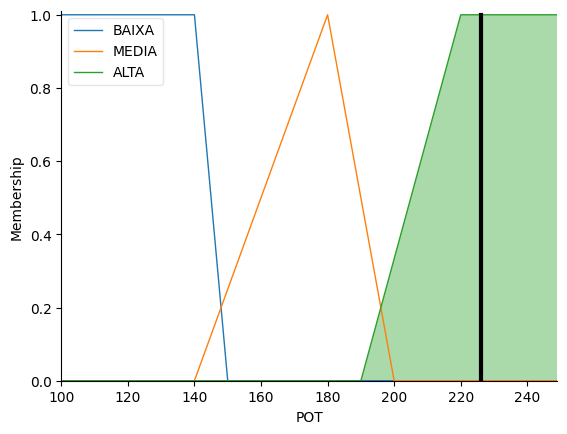

In [7]:
# Definindo universo de discurso e nome da variável
universoTemperatura = np.arange(-5, 20)
universoTempo = np.arange(0, 30)
universoPotencia = np.arange(100, 250)

temperatura = control.Antecedent(universe = universoTemperatura, label = "Temp")
tempoMedio = control.Antecedent(universe = universoTempo, label = "TM")

# Criando função de pertinência triangular -> trimf, trapezoidal -> trapmf
temperatura["BAIXA"] = fuzzy.trapmf(temperatura.universe, [-5, -5, 2, 4])
temperatura["MEDIA"] = fuzzy.trimf(temperatura.universe, [3, 10, 15])
temperatura["ALTA"] = fuzzy.trapmf(temperatura.universe, [14, 16, 20, 20])

tempoMedio["CURTO"] = fuzzy.trapmf(tempoMedio.universe, [0, 0, 10, 14])
tempoMedio["MEDIO"] = fuzzy.trimf(tempoMedio.universe, [12, 18, 24])
tempoMedio["LONGO"] = fuzzy.trapmf(tempoMedio.universe, [20, 26, 30, 30])

potencia = control.Consequent(universe = universoPotencia, label = "POT")

potencia["BAIXA"] = fuzzy.trapmf(potencia.universe, [100, 100, 140, 150])
potencia["MEDIA"] = fuzzy.trimf(potencia.universe, [140, 180, 200])
potencia["ALTA"] = fuzzy.trapmf(potencia.universe, [190, 220, 250, 250])

# COLOQUE AS REGRAS AQUI
regra1 = control.Rule(temperatura["BAIXA"] & tempoMedio["CURTO"], potencia["MEDIA"])
regra2 = control.Rule(temperatura["MEDIA"] & tempoMedio["CURTO"], potencia["ALTA"])
regra3 = control.Rule(temperatura["ALTA"], potencia["ALTA"])
regra4 = control.Rule(temperatura["MEDIA"] & tempoMedio["LONGO"], potencia["MEDIA"])
regra5 = control.Rule(temperatura["BAIXA"] & tempoMedio["MEDIO"], potencia["MEDIA"])
regra6 = control.Rule(temperatura["BAIXA"] & tempoMedio["LONGO"], potencia["BAIXA"])


# Adicionando regras ao controle
controle = control.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6])

# Criando sistema com o controle de gorjeta
sistema = control.ControlSystemSimulation(controle)

sistema.input["Temp"] = 50
sistema.input["TM"] =  100

# Executando o sistema
sistema.compute()

print(f"Resultado 'desfuzzificado': {sistema.output['POT']}")

potencia.view(sim = sistema)